# **Visualize Image Features Learned by VGG19 Model in layers (TensorFlow 2)**

In this notebook we will be accessing the layers of the VGG19 model to visualize the features learned by the model while processing an image.


### **Lets import the required modules and mount the drive**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pf
import seaborn as sns

from tensorflow.keras.models import Model
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

from PIL import Image
from tensorflow.keras.preprocessing import image

**Print TensorFlow version**

In [2]:
print(tf.__version__)

2.8.2


**Load the Drive**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### **Instantiate the VGG19 architecture model (from tensorflow.keras.applications)**

Instantiate the VGG19 architecture and view the summary

In [4]:
vgg_model = VGG19()

In [5]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     


### **Set the input and output variables for a new VGG19 arch based model**

Set the input and output variables for us to use to build a new model with the VGG19 architecture, which takes the inputs like the VGG19's and which outputs the outputs from the VGG19 layers.

In [6]:
vgg_inputs = vgg_model.input
vgg_layers = vgg_model.layers
layer_names = [layer.name for layer in vgg_model.layers]
vgg_layer_outputs = [layer.output for layer in vgg_layers ]

for (i, item) in enumerate(layer_names, start=0):
    print(i, item)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_conv4
11 block3_pool
12 block4_conv1
13 block4_conv2
14 block4_conv3
15 block4_conv4
16 block4_pool
17 block5_conv1
18 block5_conv2
19 block5_conv3
20 block5_conv4
21 block5_pool
22 flatten
23 fc1
24 fc2
25 predictions


### **Create a new model based on VGG19 architecture**

In [7]:
feature_model = Model(inputs = vgg_inputs, outputs = vgg_layer_outputs )

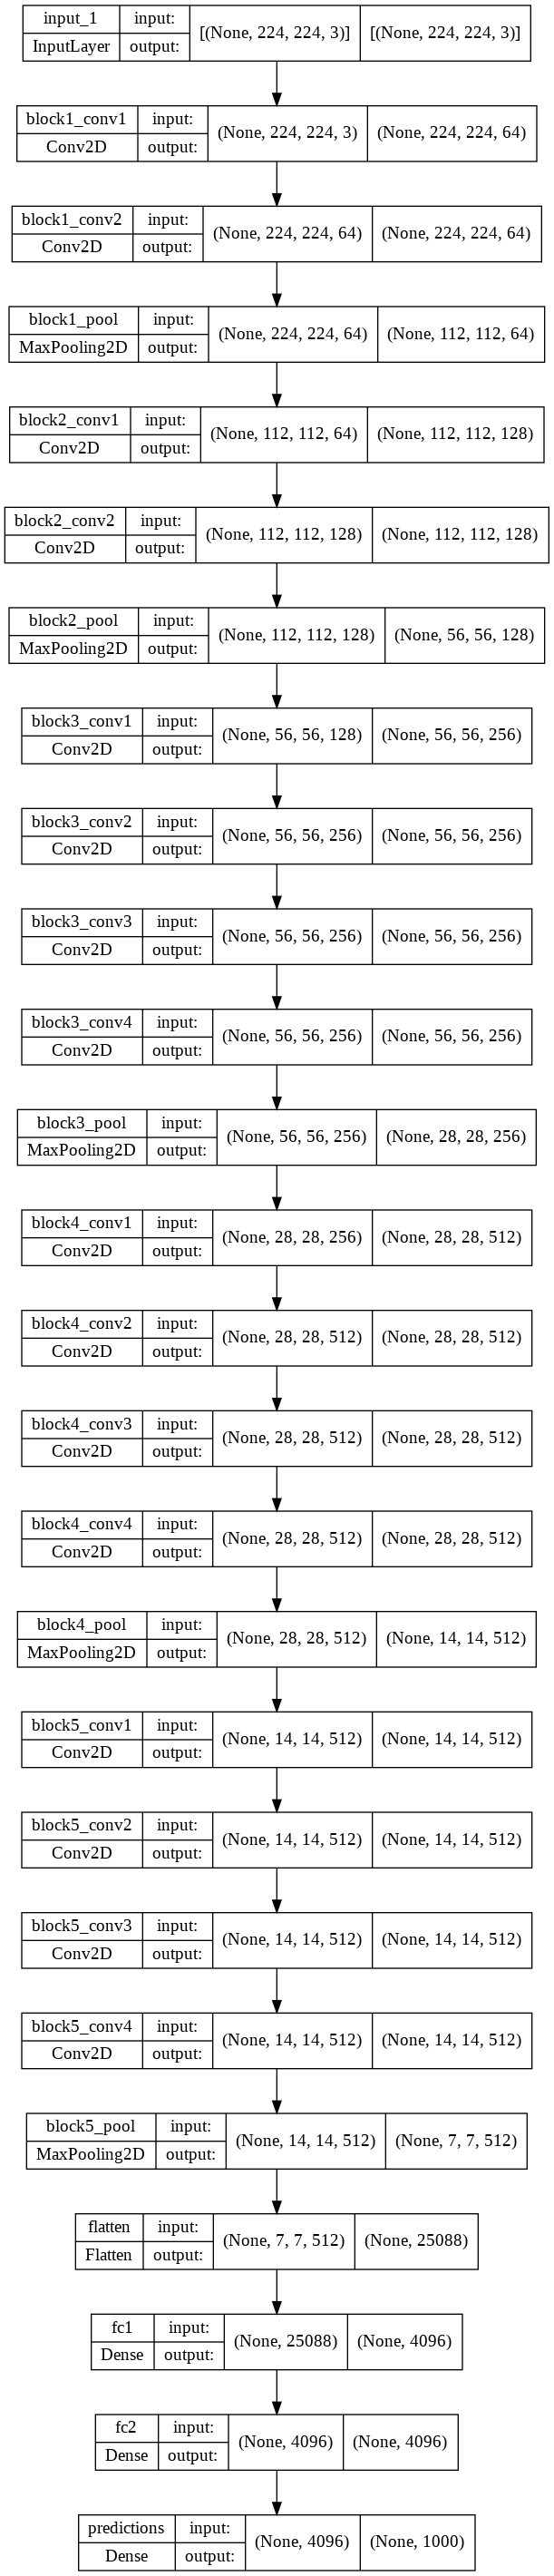

In [8]:
tf.keras.utils.plot_model(feature_model, 'vgg19_model.png', show_shapes = True)

### **Load and Preprocess Image**

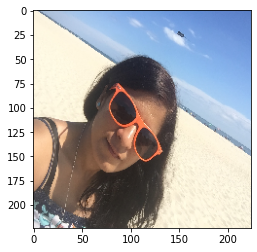

In [9]:
image_path = '/content/gdrive/MyDrive/data/myPerson.JPG'
img = image.load_img(image_path, target_size=(224, 224))
plt.imshow(img.rotate(angle=180))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.image.rot90(x, k = 2)
x = preprocess_input(x)


### **Extract the features of the Image using the new feature_model**

In [10]:
extracted_features = feature_model(x)

### **Visualize image channels in the input layer of the feature model**


 f1.shape:  (1, 224, 224, 3) Layer: input_1


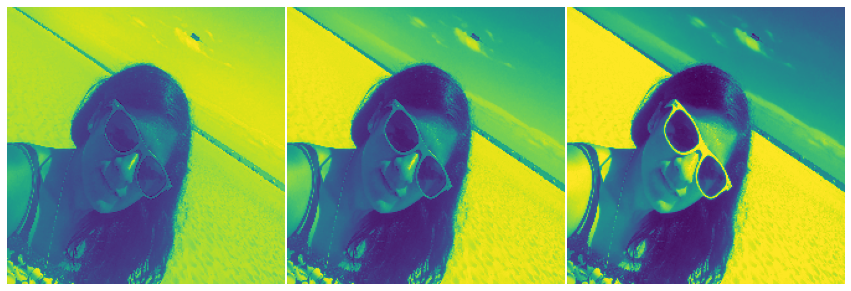

In [11]:
f1 = extracted_features[0]
print('\n f1.shape: ', f1.shape,'Layer:', layer_names[0])
imgs = f1[0,:,:]
plt.figure(figsize = (15,15))
for n in range(3):
    ax = plt.subplot(1,3, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)



### **Visualize features in the first layer of the feature model**


 f2.shape:  (1, 224, 224, 64) Layer: block1_conv1


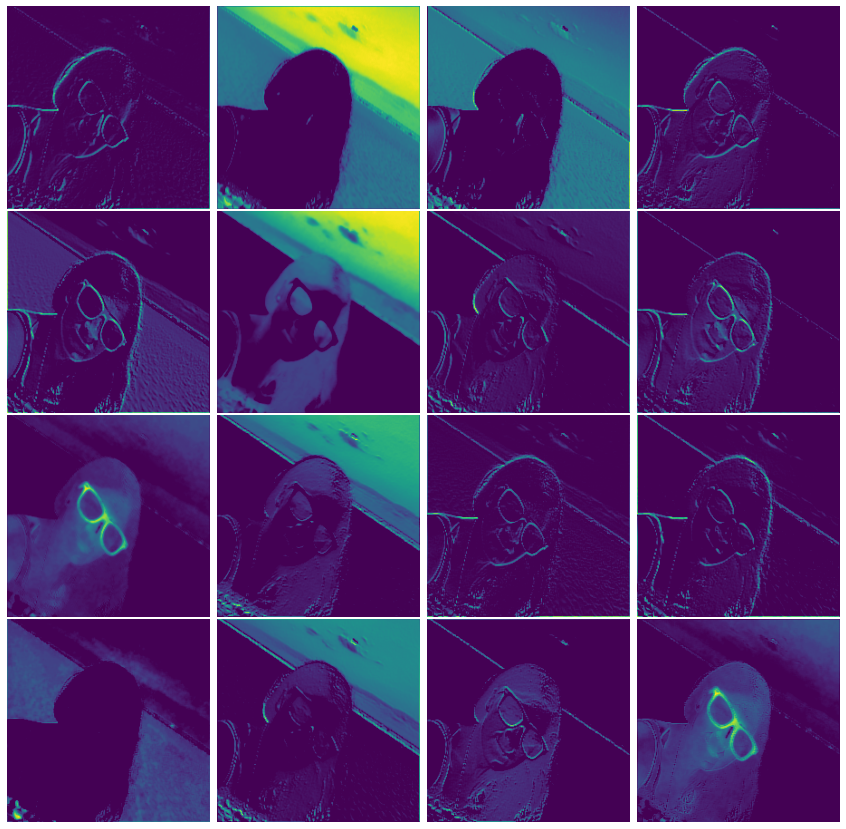

In [12]:
# Visualize some features in the first hidden layer

f2 = extracted_features[1]
print('\n f2.shape: ', f2.shape,'Layer:', layer_names[1])

imgs = f2[0,:,:]
plt.figure(figsize =(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)

### **Visualize features in all the layers**

Iterate through all the extracted layers to visualize feature maps at each layer 

0 Layer: input_1 Layer shape:  (1, 224, 224, 3)


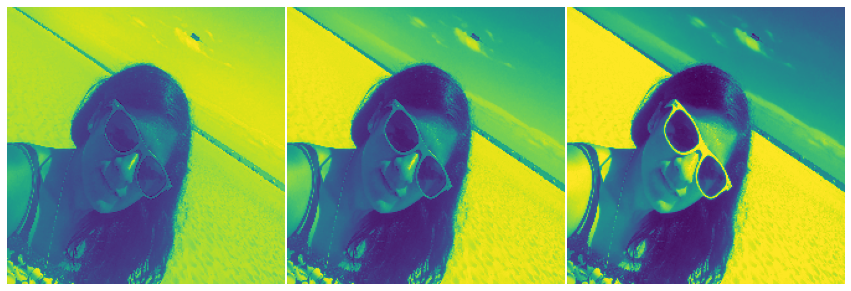

1 Layer: block1_conv1 Layer shape:  (1, 224, 224, 64)


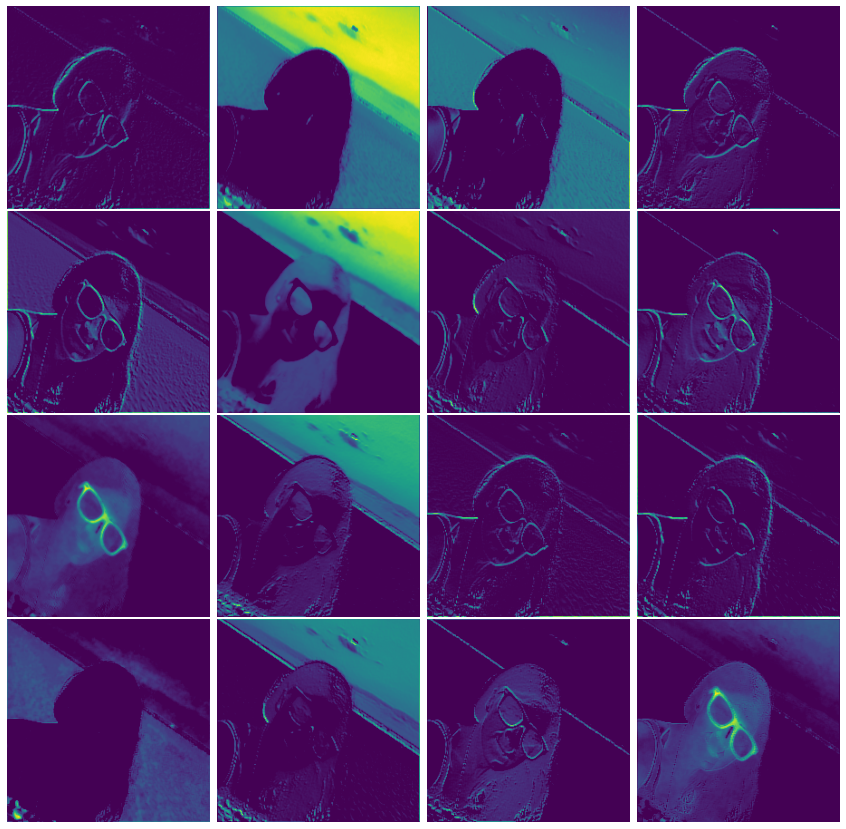

2 Layer: block1_conv2 Layer shape:  (1, 224, 224, 64)


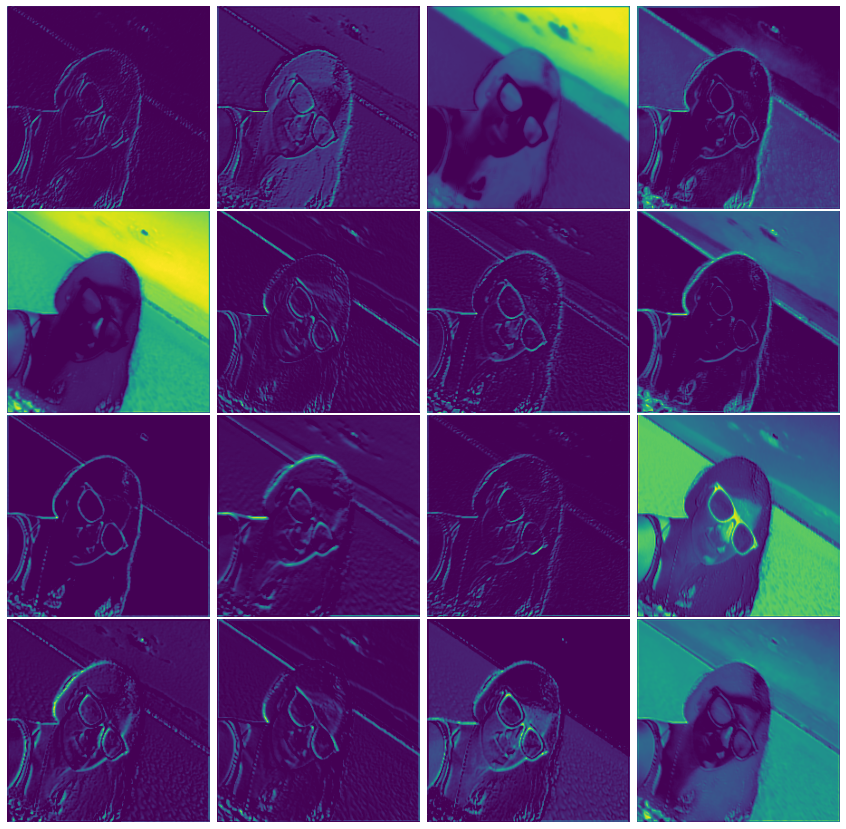

3 Layer: block1_pool Layer shape:  (1, 112, 112, 64)


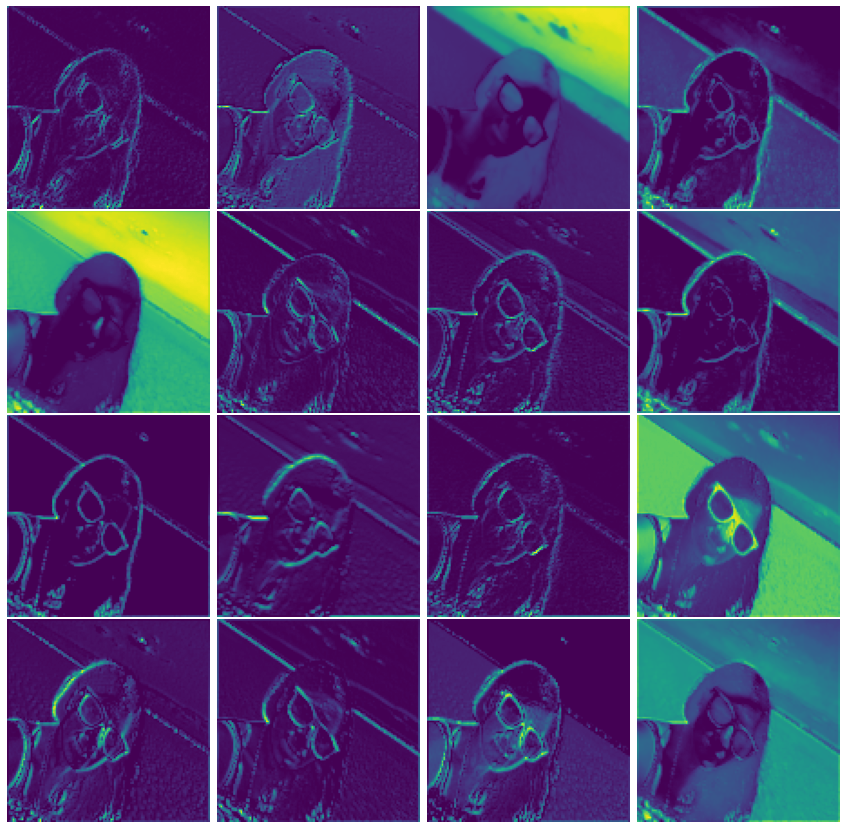

4 Layer: block2_conv1 Layer shape:  (1, 112, 112, 128)


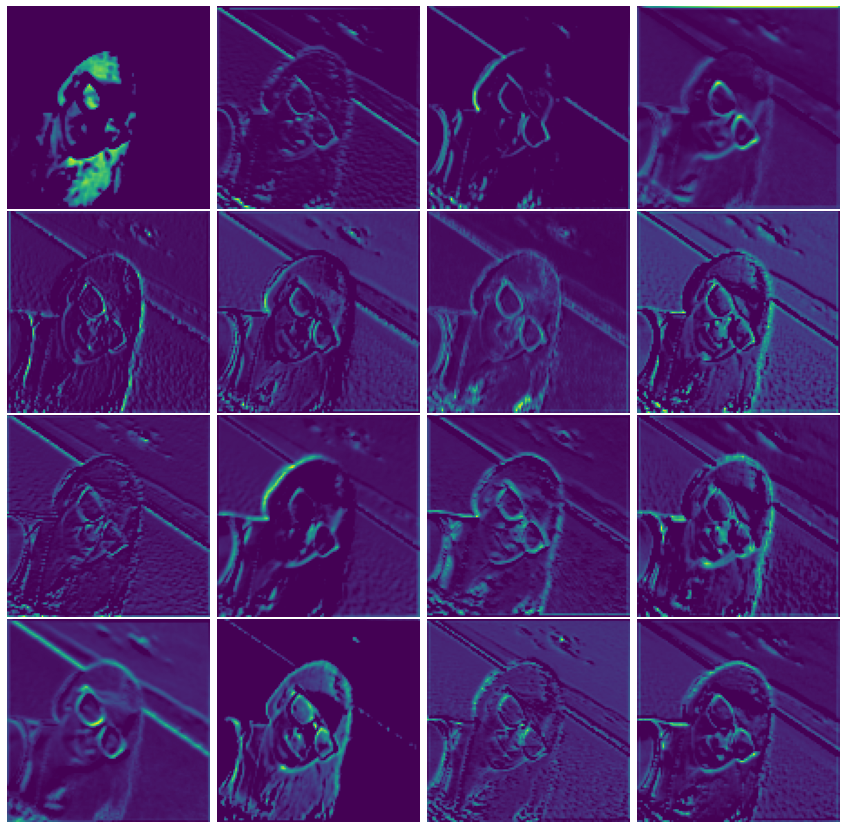

5 Layer: block2_conv2 Layer shape:  (1, 112, 112, 128)


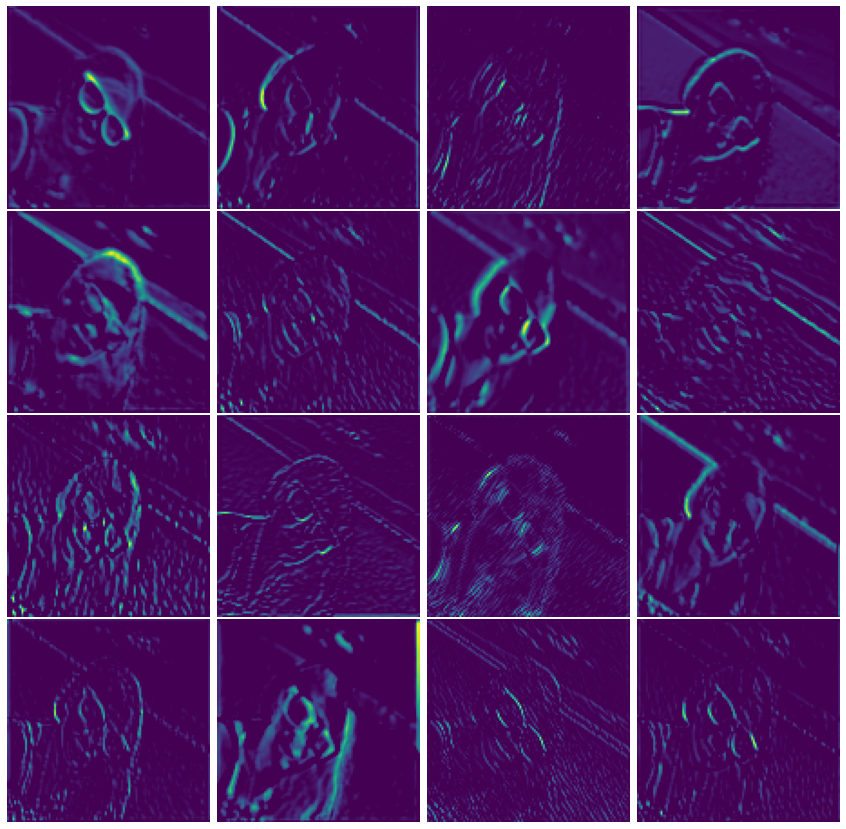

6 Layer: block2_pool Layer shape:  (1, 56, 56, 128)


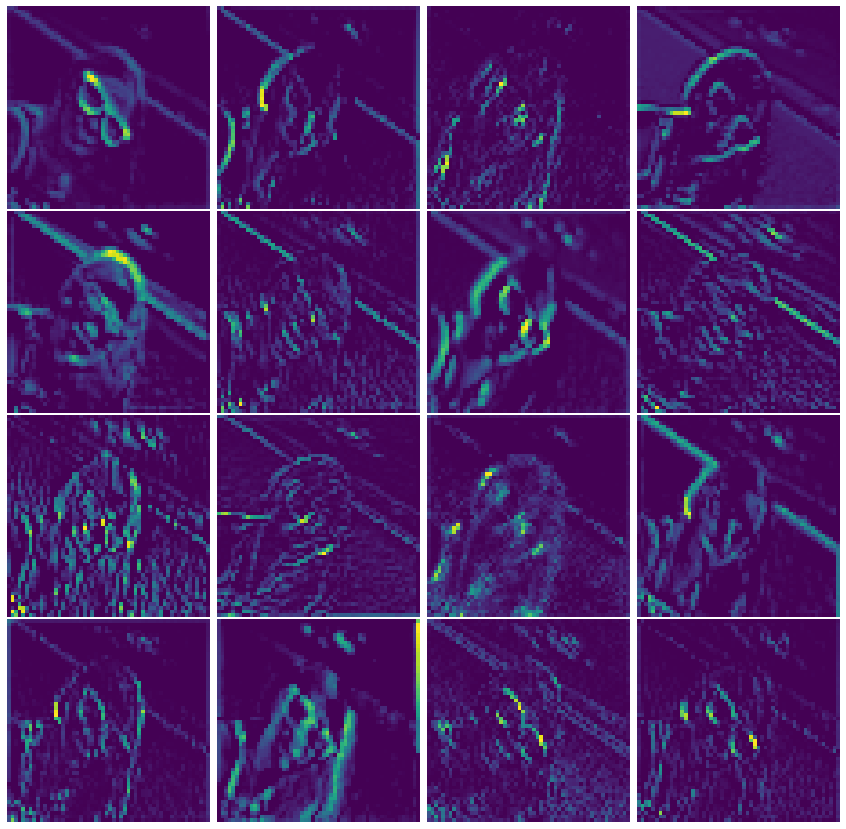

7 Layer: block3_conv1 Layer shape:  (1, 56, 56, 256)


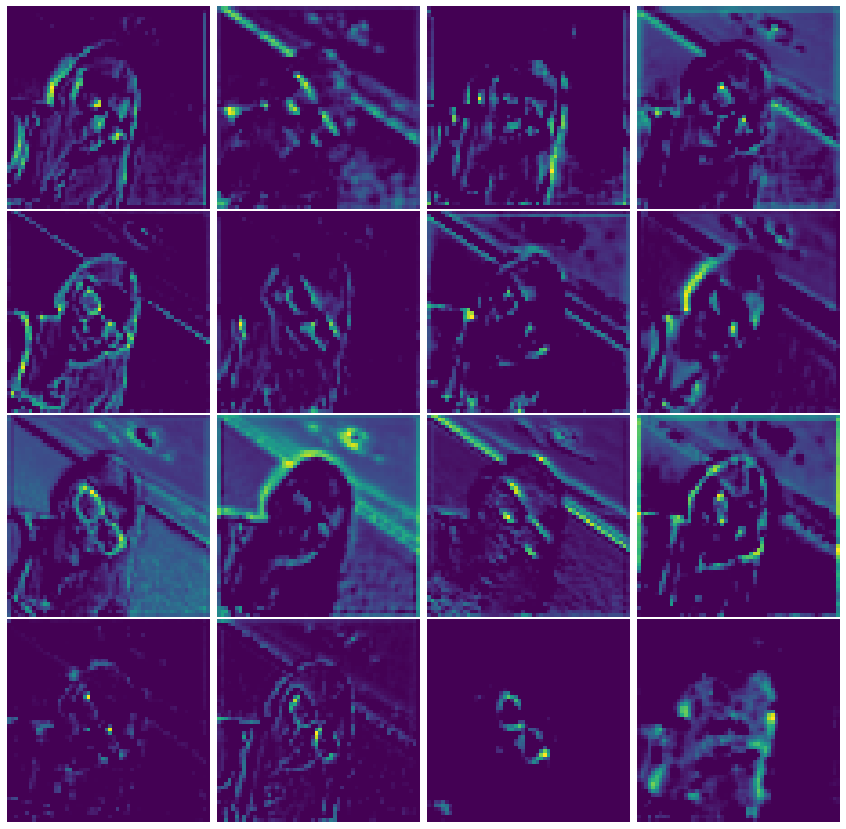

8 Layer: block3_conv2 Layer shape:  (1, 56, 56, 256)


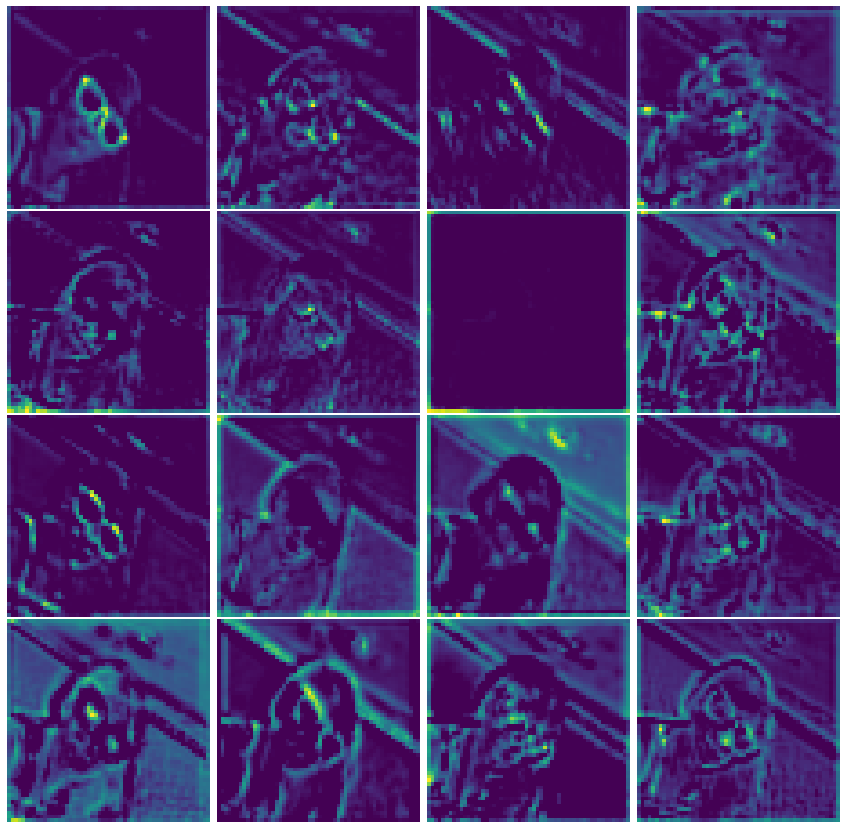

9 Layer: block3_conv3 Layer shape:  (1, 56, 56, 256)


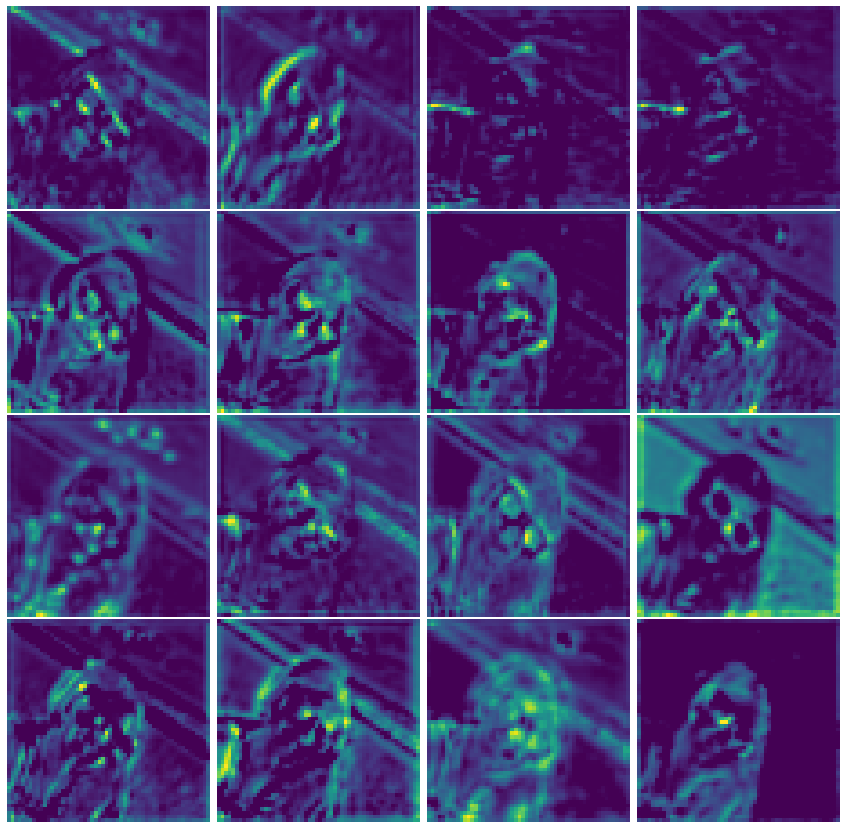

10 Layer: block3_conv4 Layer shape:  (1, 56, 56, 256)


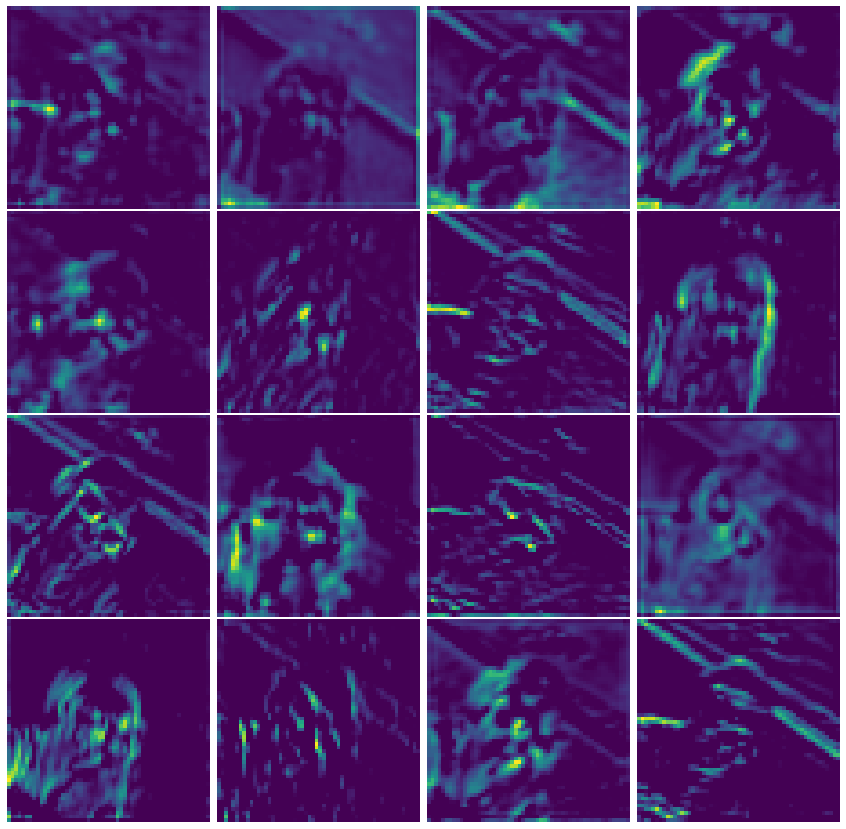

11 Layer: block3_pool Layer shape:  (1, 28, 28, 256)


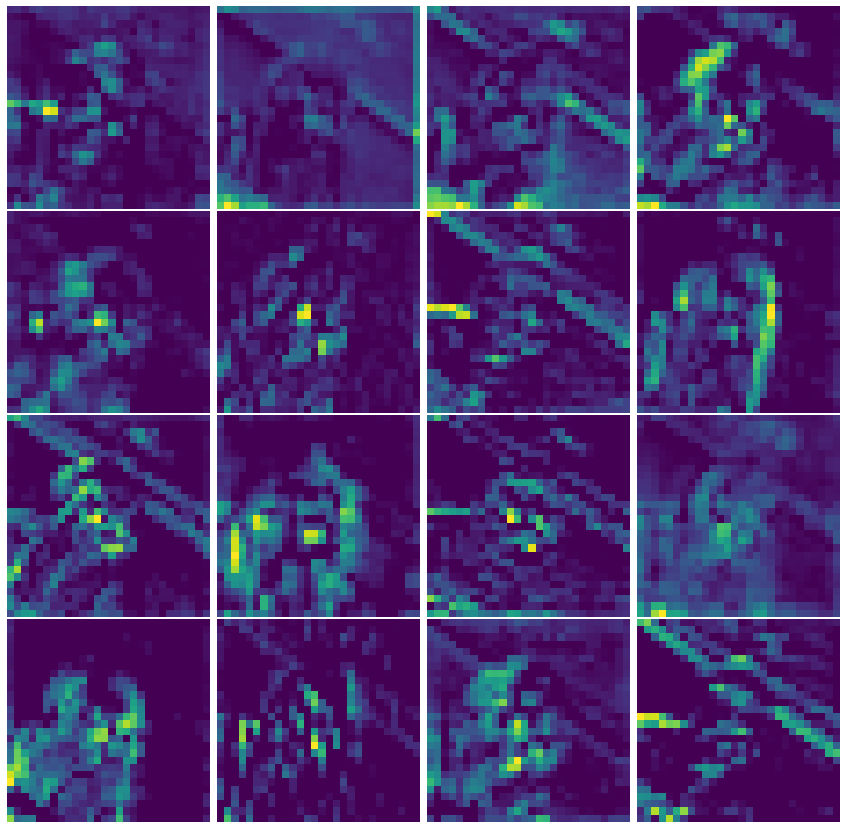

12 Layer: block4_conv1 Layer shape:  (1, 28, 28, 512)


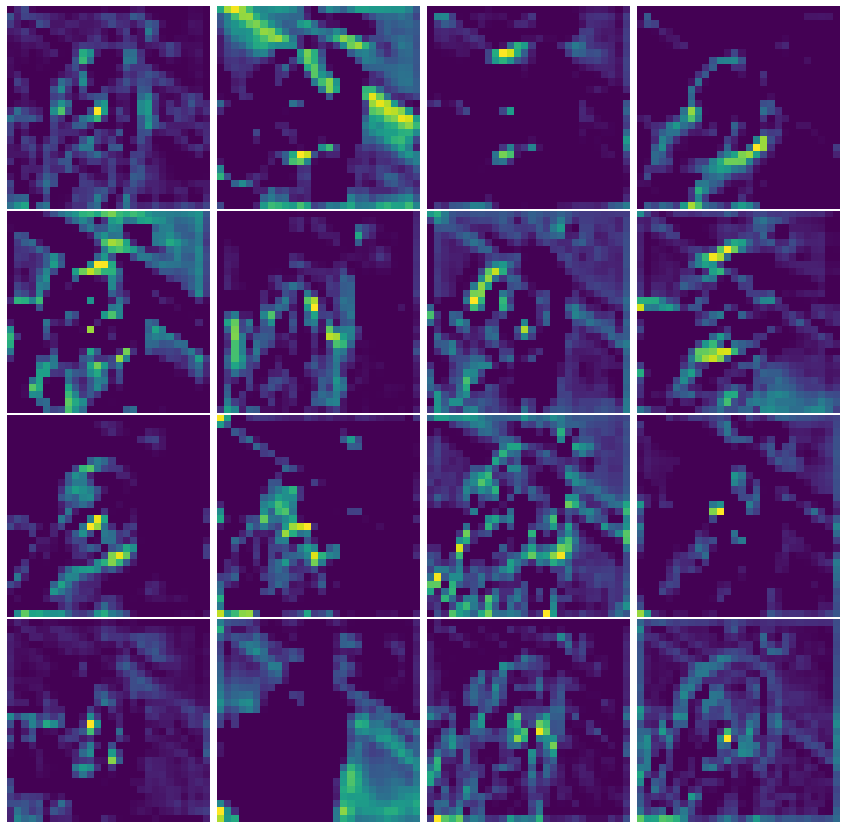

13 Layer: block4_conv2 Layer shape:  (1, 28, 28, 512)


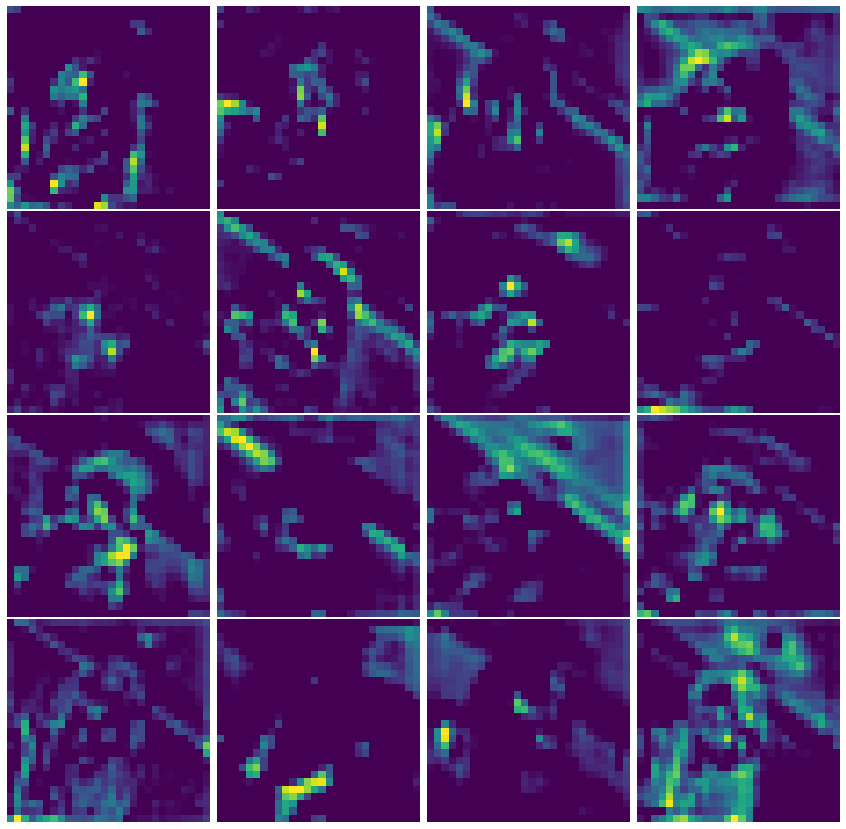

14 Layer: block4_conv3 Layer shape:  (1, 28, 28, 512)


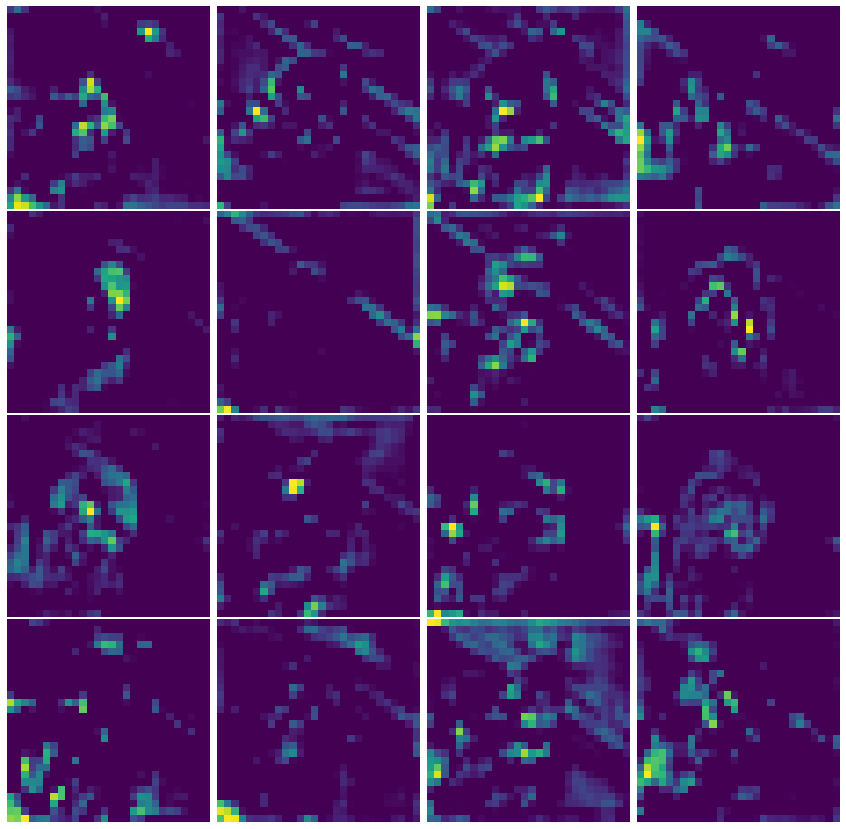

15 Layer: block4_conv4 Layer shape:  (1, 28, 28, 512)


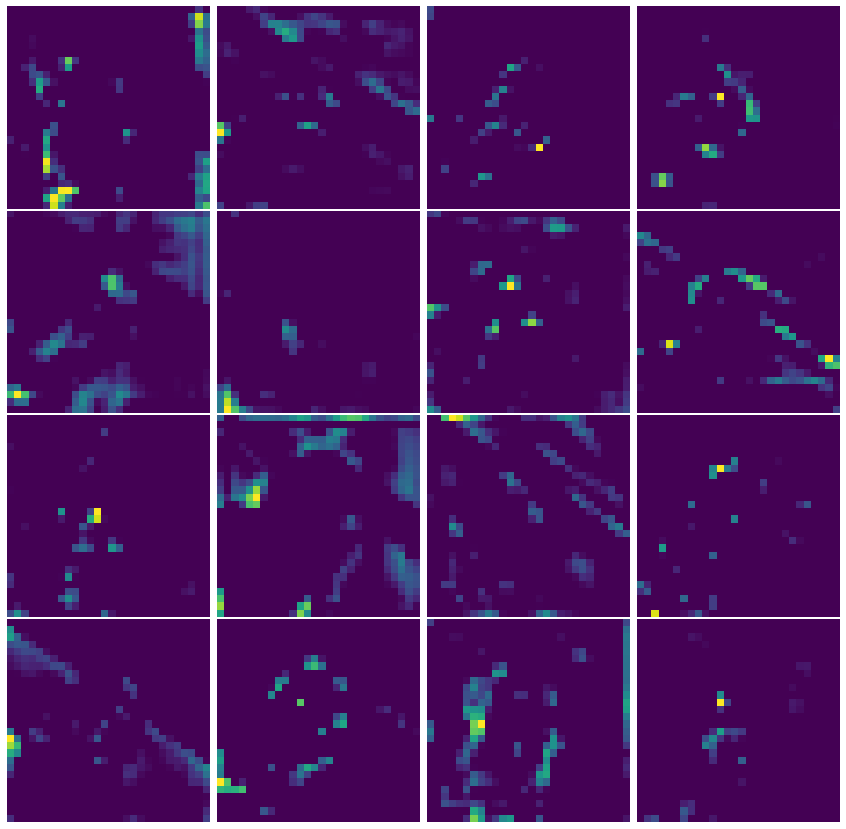

16 Layer: block4_pool Layer shape:  (1, 14, 14, 512)


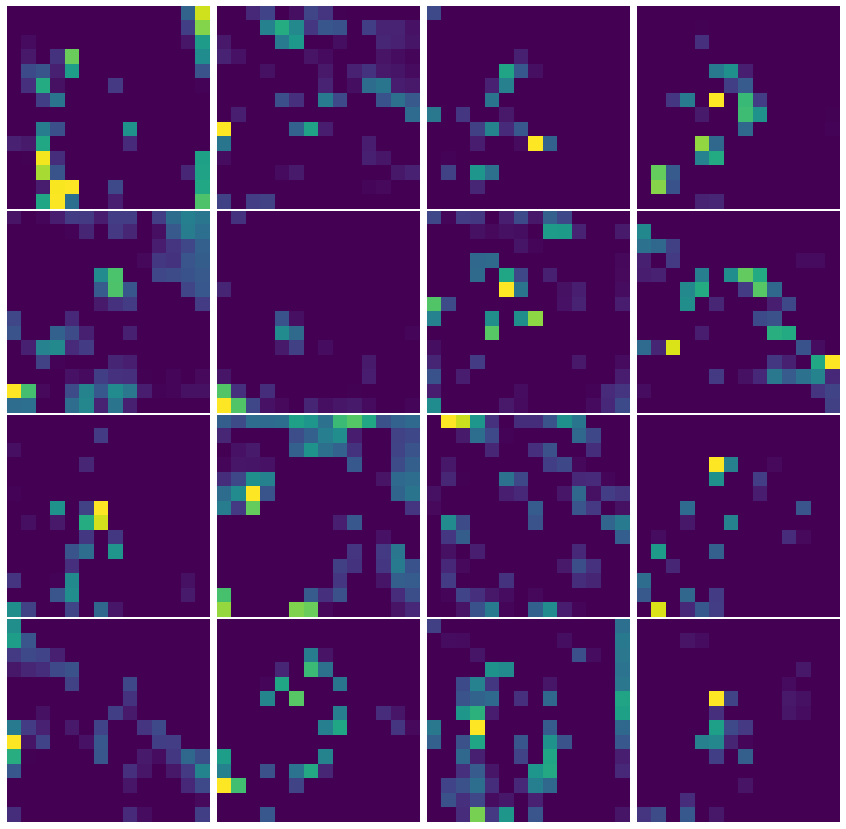

17 Layer: block5_conv1 Layer shape:  (1, 14, 14, 512)


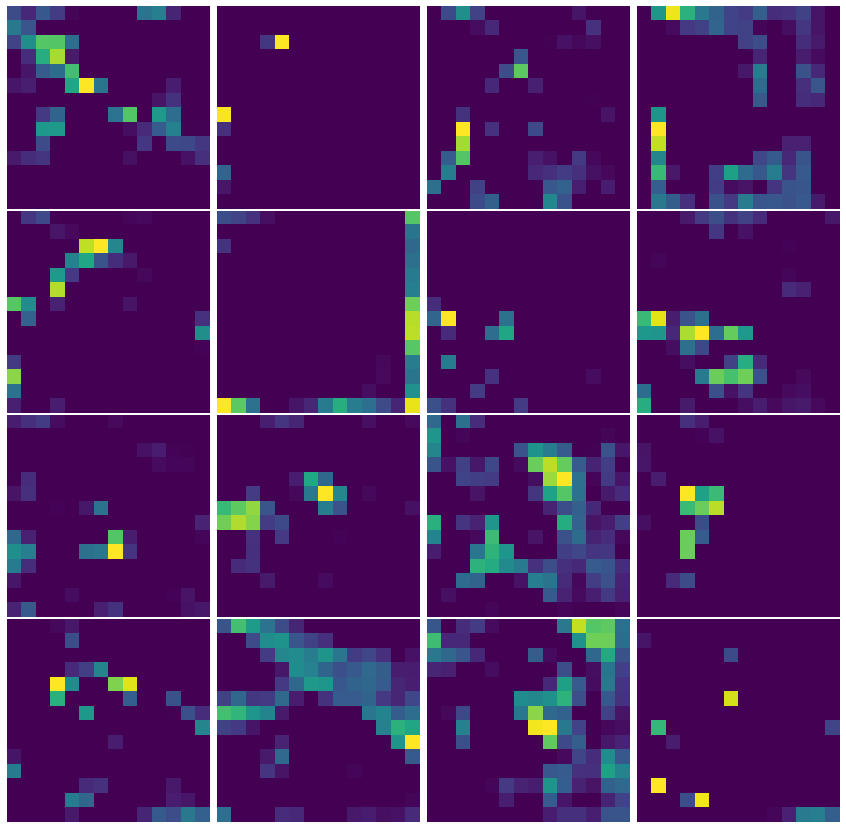

18 Layer: block5_conv2 Layer shape:  (1, 14, 14, 512)


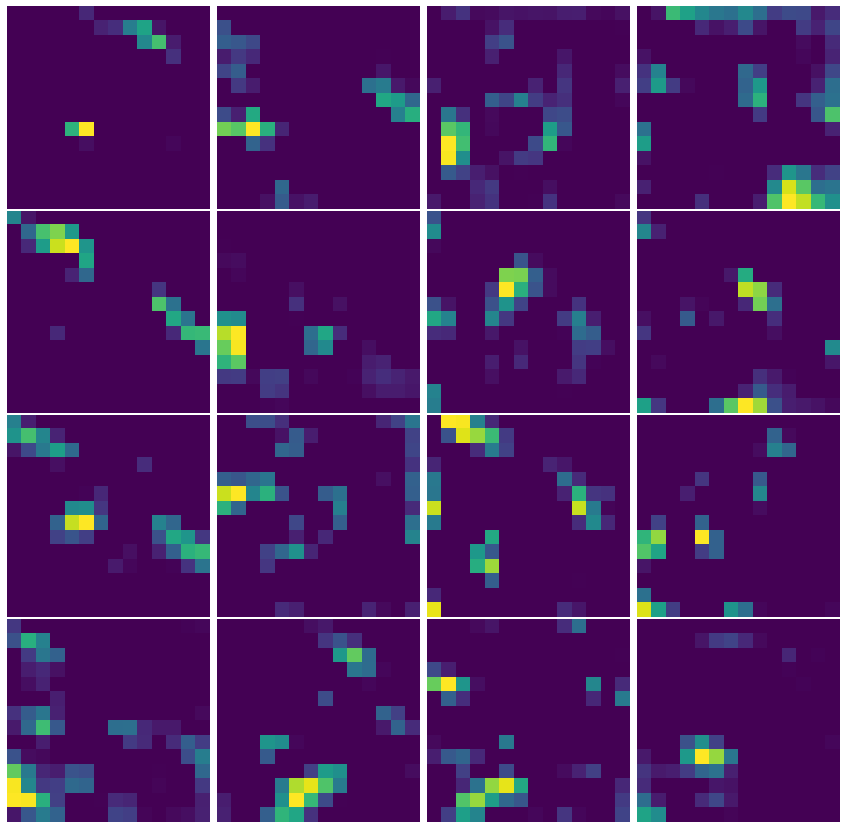

19 Layer: block5_conv3 Layer shape:  (1, 14, 14, 512)


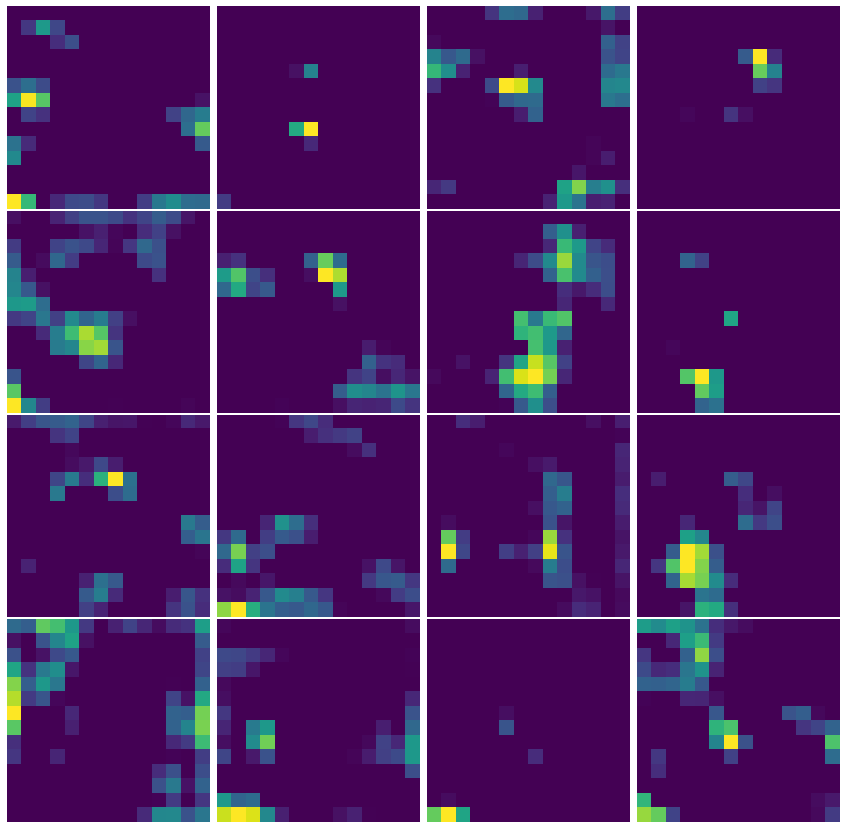

20 Layer: block5_conv4 Layer shape:  (1, 14, 14, 512)


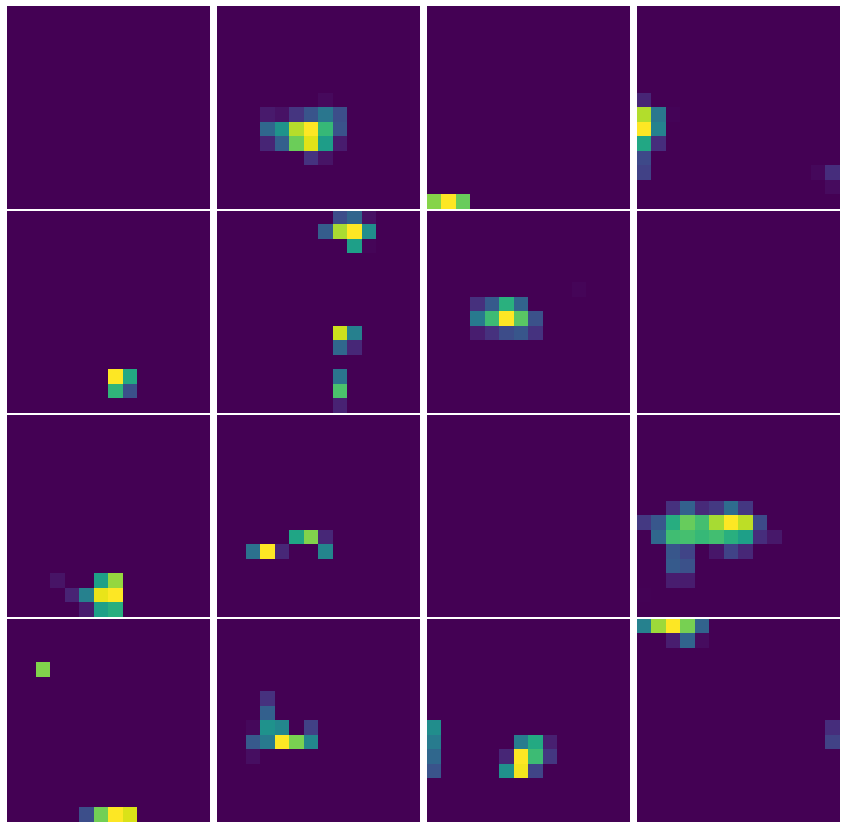

21 Layer: block5_pool Layer shape:  (1, 7, 7, 512)


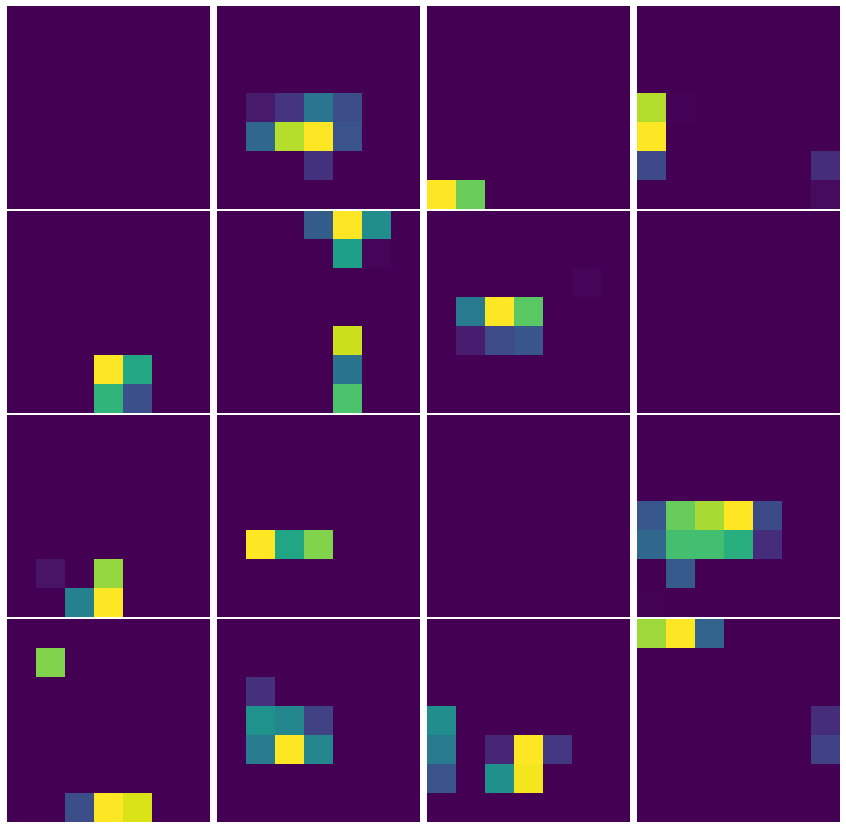

22 Layer: flatten Layer shape:  (1, 25088)
23 Layer: fc1 Layer shape:  (1, 4096)
24 Layer: fc2 Layer shape:  (1, 4096)
25 Layer: predictions Layer shape:  (1, 1000)


<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

<Figure size 1080x1080 with 0 Axes>

In [13]:
for i in range(0,len(extracted_features)):
  print (i,'Layer:', layer_names[i], 'Layer shape: ', extracted_features[i].shape, )
  plt.figure(figsize = (15,15))
  if (extracted_features[i].ndim == 4):
    features = extracted_features[i]
    imgs = features[0,:,:]
    if (i == 0):
     for n in range(3):
      ax = plt.subplot(1,3, n+1)
      plt.imshow(imgs[:,:,n])
      plt.axis('off')
      plt.subplots_adjust(wspace = 0.01, hspace = 0.01)
    else:
      imgs = extracted_features[i][0,:,:]
      #plt.figure(figsize =(15, 15))
      for n in range(16):
        ax = plt.subplot(4, 4, n+1)
        plt.imshow(imgs[:,:,n])
        plt.axis('off')
        plt.subplots_adjust(wspace = 0.01, hspace = 0.01)
    plt.show()

  
  

### Another Method to Extract Features is using Layer Names 

We can also use layer names to extract features. Build a model with the input from the feature_model as the input. And set the output to be the output of the block you are interested in visualizing. Here we set the output to be from the layer block1_pool

**Build a model with output of the layer block1_pool as the output and then visualize the features**

In [14]:
# Build a model to extract features by layer name

extracted_features_block1_pool = Model(
    inputs = feature_model.input,
    outputs = feature_model.get_layer('block1_pool').output)
block1_pool_features = extracted_features_block1_pool.predict(x)
block1_pool_features.shape


(1, 112, 112, 64)

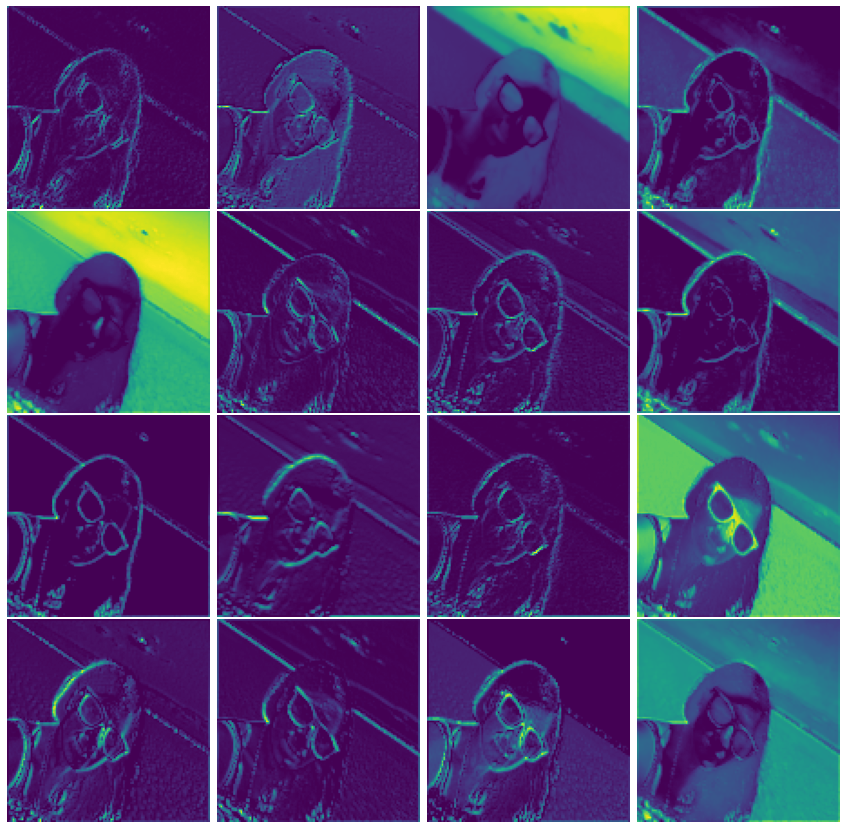

In [15]:
# Visualise some features from the extracted layer output

imgs = block1_pool_features[0,:,:]
plt.figure(figsize =(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)

**Here we set the output to be from the layer block5_conv4 to help us visualize the features from the output of that layer.**

In [16]:
# Extract features from a layer deeper in the network
extracted_features_block5_conv4 = Model(
    inputs = feature_model.input,
    outputs = feature_model.get_layer('block5_conv4').output)
block5_conv4_features = extracted_features_block5_conv4.predict(x)

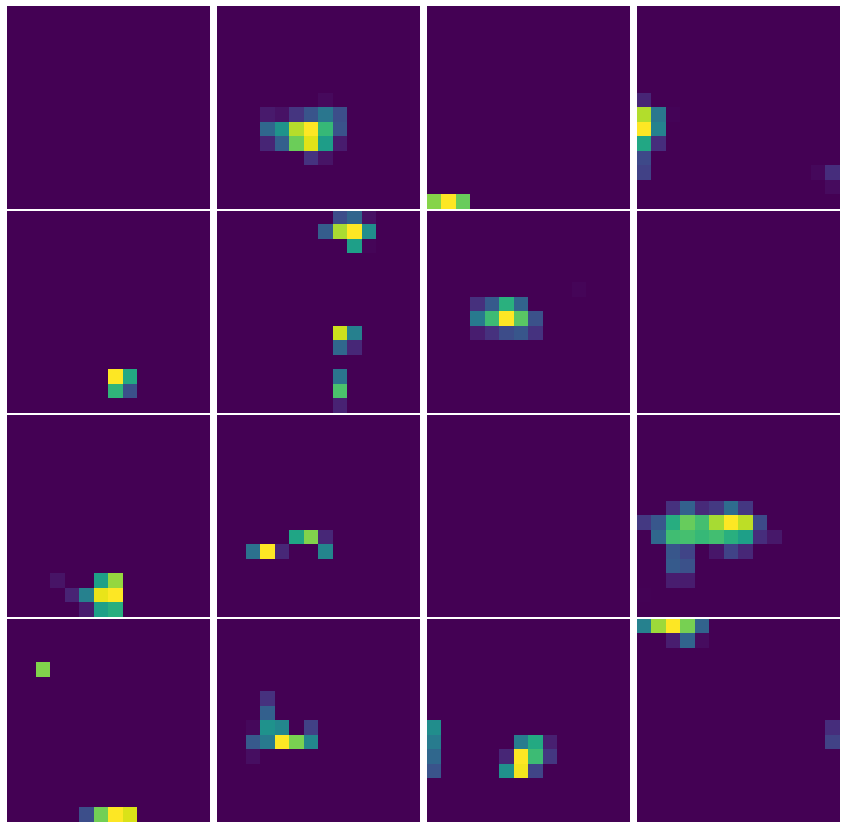

In [17]:
# Visualise some features from the extracted layer output
imgs = block5_conv4_features[0,:,:]
plt.figure(figsize =(15, 15))
for n in range(16):
    ax = plt.subplot(4, 4, n+1)
    plt.imshow(imgs[:,:,n])
    plt.axis('off')
plt.subplots_adjust(wspace = 0.01, hspace = 0.01)
